## EE559 HW1 -caoyixue

class labels: Normal (NO) and Abnormal (AB)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, DistanceMetric, accuracy_score

### (b) Pre-Processing and Exploratory data analysis:

##### i. Make scatterplots of the independent variables in the dataset. Use color to show Classes NO(0) and AB(1).

In [2]:
# read data from column_2C.data
data_path = '../data/vertebral_column_data/column_2C.dat'
column_names = ["pelvic incidence", "pelvic tilt",
                "lumbar lordosis angle", "sacral slope", 
                "pelvic radius", "grade of spondylolisthesis",
                "class label"]
df = pd.read_csv(data_path, sep=' ', names=column_names)

df.loc[df["class label"]=="NO", "class label"] = 0
df.loc[df["class label"]=="AB", "class label"] = 1
df[df.index %210 == 0]

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,class label
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
210,38.51,16.96,35.11,21.54,127.63,7.99,0


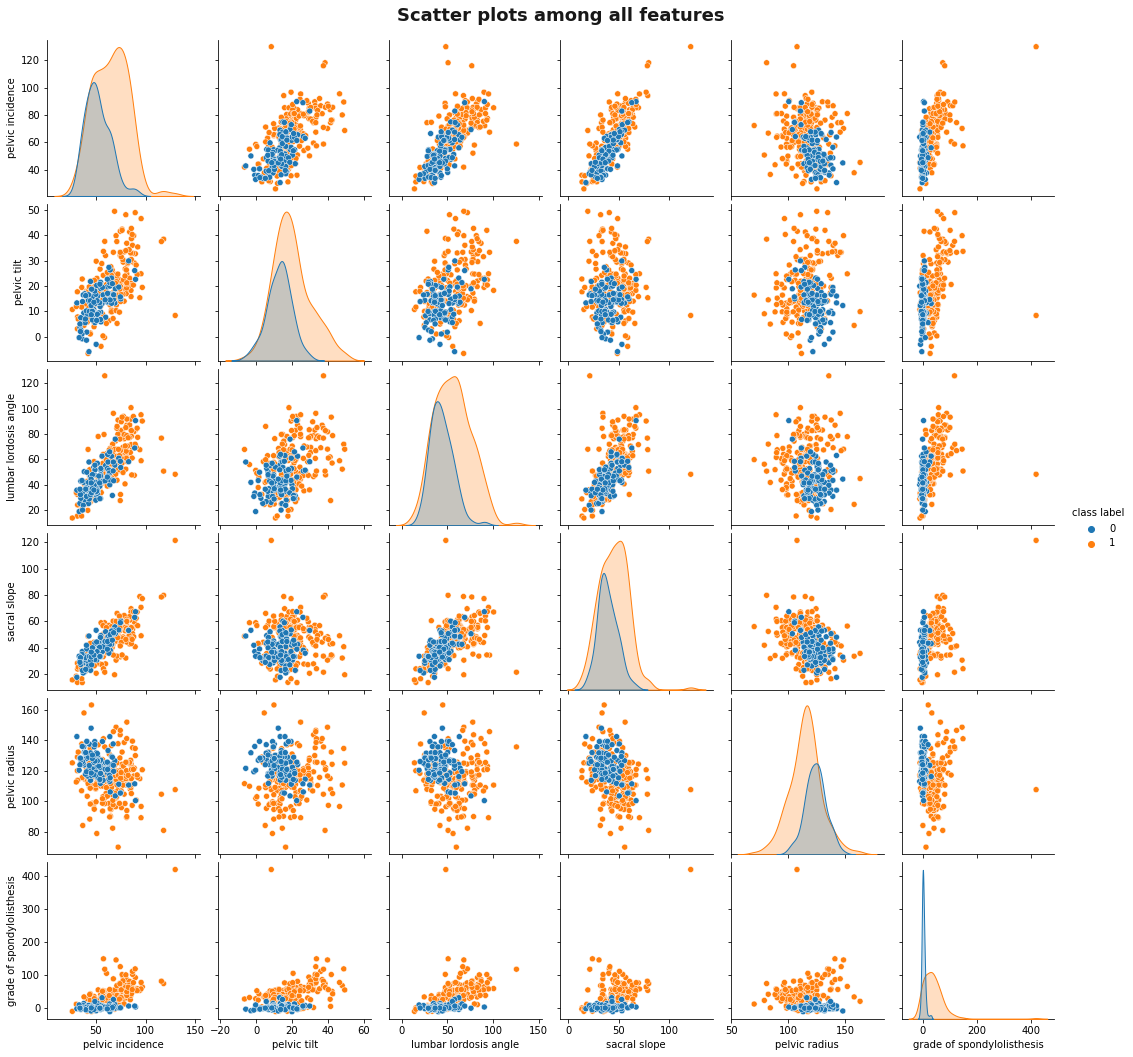

In [3]:
pairplot_fig = sns.pairplot(df, hue='class label', vars=column_names[:-1])
plt.subplots_adjust(top=0.95)
pairplot_fig.fig.suptitle("Scatter plots among all features",
                          fontsize=18, alpha=0.9, weight='bold')
plt.show()

##### ii. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1

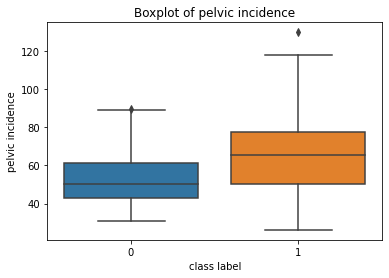

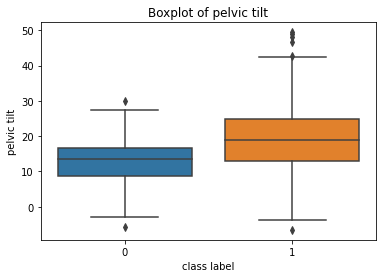

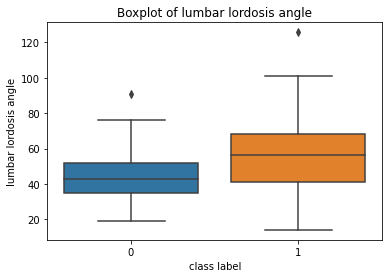

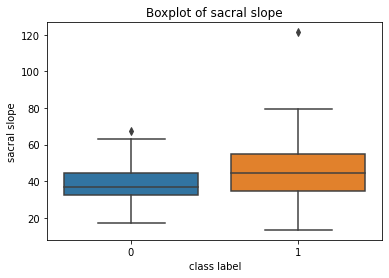

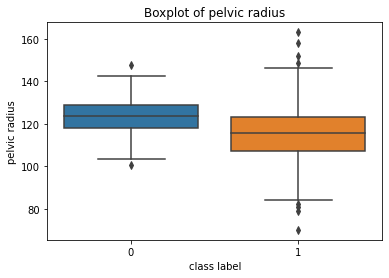

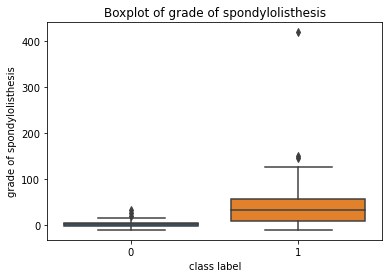

In [4]:
for name in column_names[:-1]:
    ax = sns.boxplot(x="class label", y=name, data=df[[name, "class label"]])
    ax.set_title(f"Boxplot of {name}", fontsize=12)
    plt.show()

##### iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

In [5]:
num0, num1 = 70, 140
train_data = pd.concat([df[df["class label"] == 0][:num0],
                        df[df["class label"] == 1][:num1]])
train_data.set_index(pd.Index(range(train_data.shape[0])), inplace=True)  # change index
test_data = pd.concat([df[df["class label"] == 0][num0:],
                       df[df["class label"] == 1][num1:]])
test_data.set_index(pd.Index(range(test_data.shape[0])), inplace=True)  # change index


In [6]:
print("Showing part of train data:")
display(train_data)
print("Showing part of test data:")
display(test_data)

Showing part of train data:


,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,class label
0,38.51,16.96,35.11,21.54,127.63,7.99,0
1,54.92,18.97,51.60,35.95,125.85,2.00,0
2,44.36,8.95,46.90,35.42,129.22,4.99,0
3,48.32,17.45,48.00,30.87,128.98,-0.91,0
4,45.70,10.66,42.58,35.04,130.18,-3.39,0
...,...,...,...,...,...,...,...
205,77.12,30.35,77.48,46.77,110.61,82.09,1
206,88.02,39.84,81.77,48.18,116.60,56.77,1
207,83.40,34.31,78.42,49.09,110.47,49.67,1
208,72.05,24.70,79.87,47.35,107.17,56.43,1


Showing part of test data:


,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,class label
0,50.09,13.43,34.46,36.66,119.13,3.09,0
1,64.26,14.50,43.90,49.76,115.39,5.95,0
2,53.68,13.45,41.58,40.24,113.91,2.74,0
3,49.00,13.11,51.87,35.88,126.40,0.54,0
4,59.17,14.56,43.20,44.60,121.04,2.83,0
...,...,...,...,...,...,...,...
95,80.11,33.94,85.10,46.17,125.59,100.29,1
96,95.48,46.55,59.00,48.93,96.68,77.28,1
97,74.09,18.82,76.03,55.27,128.41,73.39,1
98,87.68,20.37,93.82,67.31,120.94,76.73,1


### (c) Classification using KNN on Vertebral Column Data Set:

##### i. code for k-nearest neighbors with Euclidean metric, my Ks range from 1 to 208 and step by 1

In [7]:
X_train = np.array(train_data.iloc[:,:-1])
y_train = np.array(train_data.iloc[:,-1], dtype=int)
X_test = np.array(test_data.iloc[:,:-1])
y_test = np.array(test_data.iloc[:,-1], dtype=int)

# Standardization
# scaler = StandardScaler().fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)
# X_train.mean(axis=0), X_train.std(axis=0), X_test.mean(axis=0), X_test.std(axis=0)

In [8]:
# get list of KneighborsClassifier instances for different k
classifier_list = []
kmax = 208
Ks = np.arange(1, kmax+1)
for k in Ks:
    neigh = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
    neigh.fit(X_train, y_train)
    classifier_list.append(neigh)

##### ii. Test all the data in the test database with k nearest neighbors.

In [9]:
# get list of training error and test error
train_error_list = []
test_error_list = []
for classifier in classifier_list:
    train_error_list.append(1 - classifier.score(X_train, y_train))
    test_error_list.append(1 - classifier.score(X_test, y_test))

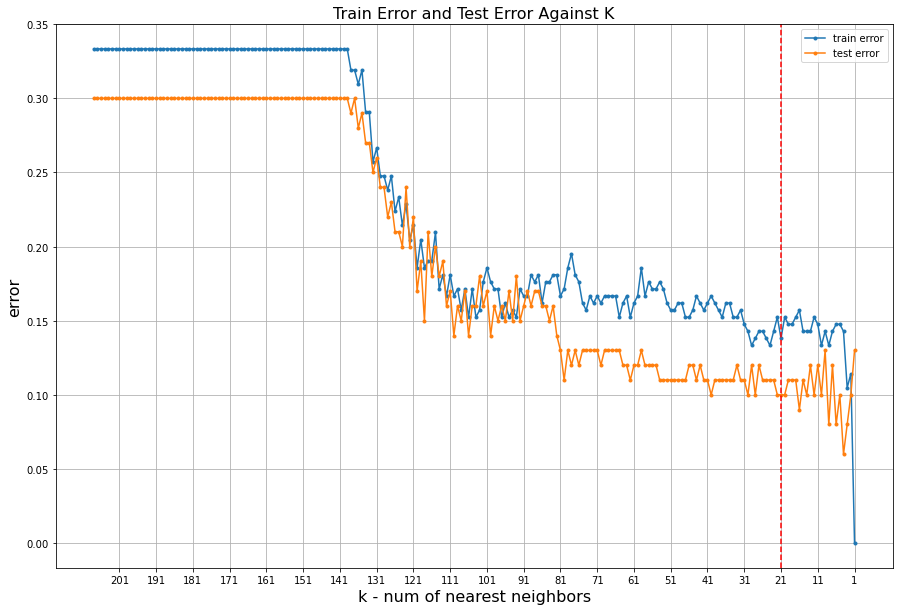

In [10]:
# Plot training error and test error in terms of k
fig, ax = plt.subplots(figsize=(15,10))
ax.grid()
ax.plot(Ks, train_error_list, '.-', label="train error")
ax.plot(Ks, test_error_list, '.-', label="test error")
ax.axvline(x=21, ymin=0, ymax=1, color='red', linestyle = '--')
ax.set_xlabel("k - num of nearest neighbors", fontsize=16)
ax.set_ylabel("error", fontsize=16)
ax.set_title("Train Error and Test Error Against K", fontsize=16)
ax.set_xticks(np.arange(min(Ks), max(Ks)+1, 10))
ax.invert_xaxis()
ax.legend()
plt.show()

From the plot, I decide to use k* = 21, because at that moment, train loss and test loss saturate. Besides, they are relatively smaller and more stable

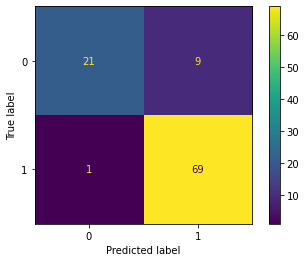

In [11]:
best_k = 21 # I choose k = 21
index_best = np.where(Ks == best_k)[0][0]
classifier = classifier_list[index_best]
y_pred = classifier.predict(X_test)
# confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.show()

<img src="../imgs/TPFPFNTN.png" alt="TPFPFNTN"/>

In [12]:
TP = np.diag(cm) # True Positive
FP = cm.sum(axis=0) - TP  # False Positive
FN = cm.sum(axis=1) - TP # False Negative
TN = cm.sum() - (FP + FN + TP) # True Negative

# True positive rate, sensitivity, hit rate or recall
TPR = TP/(TP+FN)
# True negative rate or specificity
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# F1 score
F1 = 2*PPV*TPR/(PPV+TPR)


print(f"""Considering Normal(0) is positive:
True positive rate is {TPR[0]:.2f}
True negative rate is {TNR[0]:.2f}
Precision is {PPV[0]:.2f}
F1 score is {F1[0]:.2f}""")
print("-----------------------------------------------")
print(f"""Considering Abormal(1) is positive:
True positive rate is {TPR[1]:.2f}
True negative rate is {TNR[1]:.2f}
Precision is {PPV[1]:.2f}
F1 score is {F1[1]:.2f}""")

Considering Normal(0) is positive:
True positive rate is 0.70
True negative rate is 0.99
Precision is 0.954545
F1 score is 0.807692
-----------------------------------------------
Considering Abormal(1) is positive:
True positive rate is 0.99
True negative rate is 0.70
Precision is 0.884615
F1 score is 0.932432


##### iii. Plot the best test error rate. 

$ N \in \{10,20,30,...,210\}$, For each $N$, the first $\lfloor N/3 \rfloor$ rows of NO(0) class and the first $N - \lfloor N/3 \rfloor$ rows of AB(1) class

In [13]:
def get_data(df, n):
    '''
    Parameters
    ----------
    df : pandas data frame of data
    n : the size of training set

    Results
    -------
    X_train, y_train, X_test, y_test : seperated data
    '''
    num0 = int(n/3)
    num1 = n - num0    
    train_data = pd.concat([df[df["class label"] == 1][:num1],
                            df[df["class label"] == 0][:num0]])
    test_data = pd.concat([df[df["class label"] == 1][num1:],
                            df[df["class label"] == 0][num0:]])
    X_train = np.array(train_data.iloc[:,:-1])
    y_train = np.array(train_data.iloc[:,-1], dtype=int)
    X_test = np.array(test_data.iloc[:,:-1])
    y_test = np.array(test_data.iloc[:,-1], dtype=int)

    # scaler = StandardScaler().fit(X_train)
    # X_train = scaler.transform(X_train)
    # X_test = scaler.transform(X_test)

    return X_train, y_train, X_test, y_test

def find_best_k(df, n):
    '''
    Parameters
    ----------
    df : pandas data frame of data
    n : the size of training set

    Results
    -------
    1-max_score : the minimum of test errors
    best_k : the number of nearest neighbors which gets the smallest test error 
    '''
    X_train, y_train, X_test, y_test = get_data(df, n)
    k_choices = np.arange(1, n, 5)
    max_score = 0
    best_k = 1
    for k in k_choices:
        neigh = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
        neigh.fit(X_train, y_train)
        cur_score = neigh.score(X_test, y_test)
        if cur_score > max_score:
            max_score = cur_score
            best_k = k
    return 1-max_score, best_k

In [14]:
# get list of best test error for different size of training set
best_test_error_list = []
N = np.arange(10, 220, 10)
for n in N:
    min_error, best_k = find_best_k(df, n)
    best_test_error_list.append(min_error)

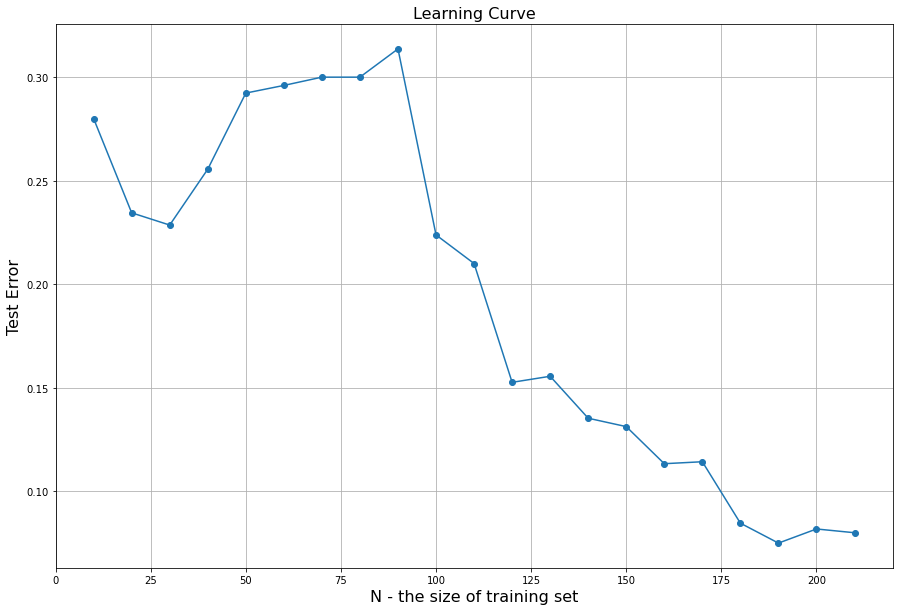

In [15]:
# plot best test error against the size of training set
fig, ax = plt.subplots(figsize=(15,10))
ax.grid()
ax.plot(N, best_test_error_list, 'o-')
ax.set_xlabel("N - the size of training set", fontsize=16)
ax.set_ylabel("Test Error", fontsize=16)
ax.set_title("Learning Curve", fontsize=16)
plt.show()

### (d) Replace the euclidean metric with other metrics:

In [16]:
def KNN_different_metrics(data, metric, p=2, weights='uniform'):
    '''
    Parameters
    ----------
    data : tuple of X_train, y_train, X_test, y_test
    metric : string, the name of metric
    p : power parameter for the minkowski metric

    Results
    -------
    1-max_score : the minimum of test errors
    best_k : the number of nearest neighbors which gets the smallest test error 
    '''
    X_train, y_train, X_test, y_test = data
    k_choices = np.arange(1, 200, 5)
    max_score = 0
    best_k = 1
    VI = np.linalg.pinv(np.cov(X_train.T))
    for k in k_choices:
        if metric == "mahalanobis":
            neigh = KNeighborsClassifier(n_neighbors=k,
                                         metric=metric,
                                         metric_params={'VI': VI},
                                         weights=weights)
        else:
            neigh = KNeighborsClassifier(n_neighbors=k, p=p, metric=metric, weights=weights)

        neigh.fit(X_train, y_train)
        cur_score = neigh.score(X_test, y_test)
        if cur_score > max_score:
            max_score = cur_score
            best_k = k
    return 1-max_score, best_k


In [17]:
data = get_data(df, n=210)
diff_metrics_error_list = []
diff_metrics_best_k_list = []

##### i. Minkowski Distance:

A. which becomes Manhattan Distance with p = 1.

In [18]:
min_error, best_k = KNN_different_metrics(data, metric="manhattan")
print(f"the minimum test error of manhattan distance is {min_error:.4f}")
print(f"the best k of manhattan distance is {best_k}")
diff_metrics_error_list.append(min_error)
diff_metrics_best_k_list.append(str(best_k))

min_error, best_k = KNN_different_metrics(data, metric="minkowski", p=1)
print(f"the minimum test error of minkowski distance with p=1 is {min_error:.4f}")
print(f"the best k of minkowski distance with p=1 is {best_k}")
diff_metrics_error_list.append(min_error)
diff_metrics_best_k_list.append(str(best_k))

the minimum test error of manhattan distance is 0.1100
the best k of manhattan distance is 6
the minimum test error of minkowski distance with p=1 is 0.1100
the best k of minkowski distance with p=1 is 6


From above result, it shows manhattan distance does equal to minkowski distance with p=1

B. k* = 6. Using minkowski distance with $p \in \{10^{0.1}, 10^{0.2}, 10^{0.3},...,10^{1}\}.$ Find best $p$. 

In [19]:
log_ps = np.arange(0.1, 1.1, 0.1)
X_train, y_train, X_test, y_test = data
max_score = 0
best_log_p = 0
k = 6
for log_p in log_ps:
    neigh = KNeighborsClassifier(n_neighbors=k, p=10**log_p, metric="minkowski")
    neigh.fit(X_train, y_train)
    cur_score = neigh.score(X_test, y_test)
    if cur_score > max_score:
        max_score = cur_score
        best_log_p = log_p

print(f"the best log10(p) is {best_log_p}")
diff_metrics_error_list.append(1-max_score)
diff_metrics_best_k_list.append(str(k))

the best log10(p) is 0.6


So I find the best $log_{10}(p)$ is 0.6

C. minkowski distance with $p \to \infty$ becomes chebyshev distance.

In [20]:
min_error, best_k = KNN_different_metrics(data, metric="minkowski", p=np.inf)
print(f"the minimum test error of minkowski distance with p=numpy.inf is {min_error:.4f}")
print(f"the best k of minkowski distance with p=numpy.inf is {best_k}")
diff_metrics_error_list.append(min_error)
diff_metrics_best_k_list.append(str(best_k))

min_error, best_k = KNN_different_metrics(data, metric="chebyshev")
print(f"the minimum test error of chebyshev distance is {min_error:.4f}")
print(f"the best k of chebyshev distance is {best_k}")
diff_metrics_error_list.append(min_error)
diff_metrics_best_k_list.append(str(best_k))

the minimum test error of minkowski distance with p=numpy.inf is 0.0800
the best k of minkowski distance with p=numpy.inf is 16
the minimum test error of chebyshev distance is 0.0800
the best k of chebyshev distance is 16


From above result, it shows chebyshev distance does equal to minkowski distance with p=numpy.inf

##### ii. Mahalanobis Distance:

In [21]:
min_error, best_k = KNN_different_metrics(data, metric="mahalanobis")
print(f"the minimum test error of mahalanobis distance is {min_error:.4f}")
print(f"the best k of mahalanobis distance is {best_k}")
diff_metrics_error_list.append(min_error)
diff_metrics_best_k_list.append(str(best_k))

the minimum test error of mahalanobis distance is 0.1700
the best k of mahalanobis distance is 1


Summary:

In [22]:
diff_metrics_name = ["manhattan distance", "minkowski distance with p=1",
                     "minkowski distance with p=10^0.6",
                     "minkowski distance with p=numpy.inf",
                     "chebyshev distance", "mahalanobis distance"]
show_data = [diff_metrics_error_list, diff_metrics_best_k_list]
show_table = pd.DataFrame(show_data, columns=diff_metrics_name,
                          index=["test error", "k-num of nearest neighbor"])
display(show_table)

,manhattan distance,minkowski distance with p=1,minkowski distance with p=10^0.6,minkowski distance with p=numpy.inf,chebyshev distance,mahalanobis distance
test error,0.11,0.11,0.06,0.08,0.08,0.17
k-num of nearest neighbor,6,6,6,16,16,1


### (e) Replace the majority polling decision with weighted decision:

In [23]:
metric_list = ['euclidean', 'manhattan', 'chebyshev']
weighted_KNN_error_list  = []
for metric in metric_list:
    min_error, best_k = KNN_different_metrics(data, metric=metric, weights='distance')
    print(f"the minimum test error of {metric} distance is {min_error:.4f}")
    print(f"the best k of {metric} distance is {best_k}")

the minimum test error of euclidean distance is 0.1000
the best k of euclidean distance is 6
the minimum test error of manhattan distance is 0.1000
the best k of manhattan distance is 26
the minimum test error of chebyshev distance is 0.1100
the best k of chebyshev distance is 16


### (f) What is the lowest training error rate:

It should be 0 because it will be always 0 when the k is 1